
* Nama: Fauzan Ramadhan Putra
* NIM : 24060121140140
* Lab : ML A1
* Pertemuan : Pertemuan 6 - Principal Component Analysis

In [28]:
# Mengimpor pustaka pandas untuk manipulasi dan analisis data
import pandas as pd

# Mengimpor modul pyplot dari pustaka matplotlib untuk membuat visualisasi data
from matplotlib import pyplot as plt

# Mengimpor kelas StandardScaler dari pustaka scikit-learn untuk standarisasi fitur
from sklearn.preprocessing import StandardScaler

# Mengimpor kelas PCA (Principal Component Analysis) dari pustaka scikit-learn untuk reduksi dimensi
from sklearn.decomposition import PCA

In [29]:
# Mendefinisikan link dataset
url = "https://archive.ics.uci.edu/static/public/15/data.csv"

# Membaca dataset dari URL
df = pd.read_csv(url, names=['Sample_code_number','Clump_thickness','Uniformity_of_cell_size','Uniformity_of_cell_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses','Class'])

# Menampilkan informasi mengenai struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           700 non-null    object
 1   Clump_thickness              700 non-null    object
 2   Uniformity_of_cell_size      700 non-null    object
 3   Uniformity_of_cell_shape     700 non-null    object
 4   Marginal_adhesion            700 non-null    object
 5   Single_epithelial_cell_size  700 non-null    object
 6   Bare_nuclei                  684 non-null    object
 7   Bland_chromatin              700 non-null    object
 8   Normal_nucleoli              700 non-null    object
 9   Mitoses                      700 non-null    object
 10  Class                        700 non-null    object
dtypes: object(11)
memory usage: 60.3+ KB


* Karena semua kolom typenya adalah 'object' maka ganti type disetiap kolom menjadi integer/float, kecuali untuk kolom Class yang menjadi target kita rubah kedalam bentuk String, dimana pada dataset tersebut sudah diberikan pentujuk untuk bagaimana kolom class datanya dirubah, yaitu **2 = benign, 4 = malignant**.

In [30]:
# Menggunakan pd.to_numeric untuk mengonversi nilai-nilai dalam DataFrame menjadi tipe data numerik,
# dengan menggantikan nilai yang tidak dapat dikonversi menjadi NaN.
df = df.apply(pd.to_numeric, errors='coerce')

# Mengganti nilai kelas (Class) menjadi 'benign' untuk nilai 2 dan 'malignant' untuk nilai 4.
df['Class'] = df['Class'].map({2: 'benign', 4: 'malignant'})

# Menampilkan informasi tentang DataFrame, termasuk tipe data dan jumlah nilai yang tidak hilang.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    float64
 1   Clump_thickness              699 non-null    float64
 2   Uniformity_of_cell_size      699 non-null    float64
 3   Uniformity_of_cell_shape     699 non-null    float64
 4   Marginal_adhesion            699 non-null    float64
 5   Single_epithelial_cell_size  699 non-null    float64
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    float64
 8   Normal_nucleoli              699 non-null    float64
 9   Mitoses                      699 non-null    float64
 10  Class                        699 non-null    object 
dtypes: float64(10), object(1)
memory usage: 60.3+ KB


* Setelah type datanya dirubah maka kita perlu mengecek apakah datanya adanya NaN atau tidak.

In [31]:
# Menampilkan banyak data yang NaN pada setiap kolom
df.isnull().sum()

Sample_code_number              1
Clump_thickness                 1
Uniformity_of_cell_size         1
Uniformity_of_cell_shape        1
Marginal_adhesion               1
Single_epithelial_cell_size     1
Bare_nuclei                    17
Bland_chromatin                 1
Normal_nucleoli                 1
Mitoses                         1
Class                           1
dtype: int64

* Ternyata disetiap kolom terdapat nilai yang kosong, maka kita harus menghapus nilai kosong tersebut

In [19]:
# Melakukan penghapusan data yang kosong atau tidak valid
df = df.dropna()
# Menampilkan banyak data yang NaN pada setiap kolom
df.isnull().sum()

Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [24]:
# Mencetak nilai unique dari kolom Class yang digunakan sebagai target
print(df['Class'].unique())

['benign' 'malignant']


* Ternyata pada kolom Class terdapat dua nilai unik yaitu **['benign', 'malignant']**

In [20]:
# List fitur yang akan digunakan dalam analisis data
features = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']

# Memisahkan fitur dari DataFrame, menciptakan matriks x
x = df.loc[:, features].values

# Memisahkan target ('Class') dari DataFrame, menciptakan matriks y
y = df.loc[:, ['Class']].values

# Melakukan standardisasi fitur menggunakan StandardScaler
x = StandardScaler().fit_transform(x)

* **features**: Sebuah list yang berisi nama-nama fitur yang akan digunakan dalam analisis data. Fitur-fitur ini diambil dari suatu dataset yang diasumsikan sebagai df.

* **x = df.loc[:, features].values**: Menciptakan matriks x yang berisi nilai-nilai dari fitur-fitur yang telah didefinisikan sebelumnya. Fungsi loc digunakan untuk mengakses data dalam DataFrame df berdasarkan baris dan kolom tertentu.

* **y = df.loc[:, ['Class']].values**: Menciptakan matriks target y yang berisi nilai-nilai dari kolom 'Class' dalam DataFrame df. Ini mengasumsikan bahwa 'Class' adalah target atau label dari dataset.

* **x = StandardScaler().fit_transform(x)**: Melakukan standardisasi pada data fitur (x) menggunakan StandardScaler dari scikit-learn. Standardisasi ini adalah proses normalisasi data sehingga setiap fitur memiliki rata-rata nol dan deviasi standar satu. Hal ini membantu algoritma pembelajaran mesin yang sensitif terhadap skala data untuk bekerja lebih baik.

In [21]:
# Inisialisasi objek PCA dengan menentukan jumlah komponen yang diinginkan (dalam hal ini 2)
pca = PCA(n_components=2)

# Melakukan transformasi data menggunakan PCA
principalComponents = pca.fit_transform(x)

# Membuat DataFrame baru untuk menyimpan hasil transformasi
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['Principal Component 1', 'Principal Component 2'])

# Menampilkan ringkasan statistik dari DataFrame hasil transformasi
print(principalDf.describe())

       Principal Component 1  Principal Component 2
count             683.000000           6.830000e+02
mean                0.000000           4.161304e-17
std                 2.431863           1.000694e+00
min                -2.472266          -1.764521e+00
25%                -1.832407          -2.557504e-01
50%                -1.462961           1.238632e-01
75%                 2.022949           2.837194e-01
max                 6.997844           1.980678e+01


* **Inisialisasi PCA**: Membuat objek PCA dengan menyertakan parameter n_components=2 untuk menentukan bahwa kita hanya ingin dua komponen utama.

* **Transformasi Data**: Menggunakan metode fit_transform dari objek PCA untuk mentransformasikan data x ke dalam ruang komponen utama.

* **Membuat DataFrame**: Membuat DataFrame baru (principalDf) untuk menyimpan hasil transformasi dengan memberi nama kolom sebagai 'Principal Component 1' dan 'Principal Component 2'.

* **Menampilkan Statistik Deskriptif**: Menampilkan ringkasan statistik dari DataFrame hasil transformasi menggunakan metode describe().

In [22]:
# Menggunakan fungsi concat dari pandas untuk menggabungkan dua dataframe secara berdampingan (axis=1)
finalDf = pd.concat([principalDf, df[['Class']]], axis=1)

* **pd.concat**: Fungsi ini digunakan untuk menggabungkan dua atau lebih objek pandas, dalam hal ini dua dataframe.

* **[principalDf, df[['Class']]]**: Merupakan list yang berisi dua objek yang akan digabungkan. principalDf adalah dataframe pertama, dan df[['Class']] adalah dataframe kedua yang hanya memilih kolom 'Class' dari dataframe df.

* **axis=1**: Parameter ini menunjukkan bahwa penggabungan dilakukan berdasarkan sumbu kolom. Dengan kata lain, dataframe akan digabungkan secara horizontal (berdampingan).

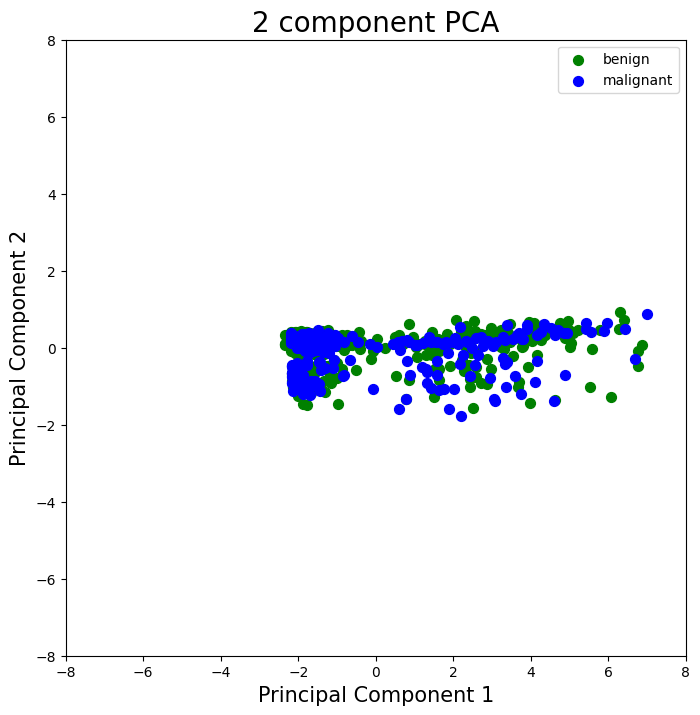

In [32]:
# Membuat gambar (figure) dengan ukuran 8x8 inci
fig = plt.figure(figsize=(8, 8))

# Menambahkan subplot 1x1 ke dalam gambar
ax = fig.add_subplot(1, 1, 1)

# Menetapkan label sumbu x dan y beserta judul plot
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Definisi kelas target dan warna yang sesuai
targets = ['benign', 'malignant']
colors = ['green', 'blue']

# Menetapkan batas sumbu x dan y
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])

# Iterasi melalui kelas target
for target, color in zip(targets, colors):
    # Mengambil indeks yang sesuai dengan kelas target
    indicesToKeep = finalDf['Class'] == target

    # Membuat scatter plot untuk setiap kelas target dengan warna yang sesuai
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               c=color, s=50)

    # Menambahkan legenda untuk setiap kelas target
    ax.legend(targets)

    # Menambahkan grid pada plot
    ax.grid()


Penjelasan Code:
* **fig = plt.figure(figsize=(8, 8))**: Membuat objek gambar (figure) dengan ukuran 8x8 inci.

* **ax = fig.add_subplot(1, 1, 1)**: Menambahkan subplot 1x1 ke dalam gambar.

* **ax.set_xlabel, ax.set_ylabel, ax.set_title**: Menetapkan label sumbu x dan y beserta judul plot.

* **targets = ['benign', 'malignant']**: Mendefinisikan kelas target.

* **colors = ['green', 'blue']**: Mendefinisikan warna yang sesuai untuk setiap kelas target.

* **ax.set_xlim([-8, 8]), ax.set_ylim([-8, 8])**: Menetapkan batas sumbu x dan y pada rentang [-8, 8].

* **for target, color in zip(targets, colors): ... **: Iterasi melalui setiap kelas target dan warna yang sesuai.

* **indicesToKeep = finalDf['Class'] == target**: Mengambil indeks yang sesuai dengan kelas target.

* **ax.scatter(...)**: Membuat scatter plot untuk setiap kelas target dengan warna yang sesuai.

* **ax.legend(targets)**: Menambahkan legenda untuk setiap kelas target.

* **ax.grid()**: Menambahkan grid pada plot.

Penjelasan Hasil:


> Gambar scatter plot 2 komponen PCA menunjukkan bahwa sampel-sampel Breast Cancer dapat dipisahkan dengan cukup baik berdasarkan nilai **Principal Component 1** dan **Principal Component 2**. Sampel-sampel **benign** cenderung berada di bagian atas kiri plot, sedangkan sampel-sampel **malignant** cenderung berada di bagian bawah kanan plot.

> Secara lebih spesifik, sampel-sampel **benign** memiliki nilai **Principal Component 1** yang lebih tinggi dan nilai **Principal Component 2** yang lebih rendah dibandingkan dengan sampel-sampel **malignant**. Hal ini menunjukkan bahwa sampel-sampel **benign** memiliki karakteristik yang berbeda dengan sampel-sampel **malignant**.

> Berdasarkan hasil ini, dapat disimpulkan bahwa **Principal Component 1** dan **Principal Component 2** dapat digunakan untuk membedakan antara sampel-sampel **benign** dan **malignant** dengan cukup baik. Hal ini dapat dimanfaatkan untuk meningkatkan akurasi klasifikasi Breast Cancer.



In [26]:
# Hasil PCA
pca.explained_variance_ratio_

array([0.59053008, 0.09999221])

Hasil run PCA menunjukkan bahwa komponen utama pertama (PC1) mampu menjelaskan sekitar 59.1% dari total varians dalam data, sementara komponen utama kedua (PC2) memberikan kontribusi sebesar 10%. Kombinasi kedua rasio ini memberikan gambaran tentang seberapa baik representasi data telah direduksi dimensinya oleh dua komponen utama pertama. Dengan demikian, penggunaan PC1 dan PC2 mampu menjelaskan sebagian besar variabilitas dalam data asli, memungkinkan reduksi dimensi tanpa kehilangan informasi yang signifikan. Hasil ini memberikan wawasan tentang kontribusi relatif dari setiap komponen utama terhadap variasi total dalam data yang telah diproses menggunakan teknik PCA.